## **Meta Prophet**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

sns.set(rc={'figure.figsize':(16,8)})

In [5]:
url='https://raw.githubusercontent.com/mikekeith52/scalecast-examples/main/prophet/daily-website-visitors.csv'
df=pd.read_csv(url,sep=',')
df=df[['Date','First.Time.Visits']]
df.head()

,Date,First.Time.Visits
0,9/14/2014,1430
1,9/15/2014,2297
2,9/16/2014,2352
3,9/17/2014,2327
4,9/18/2014,2130


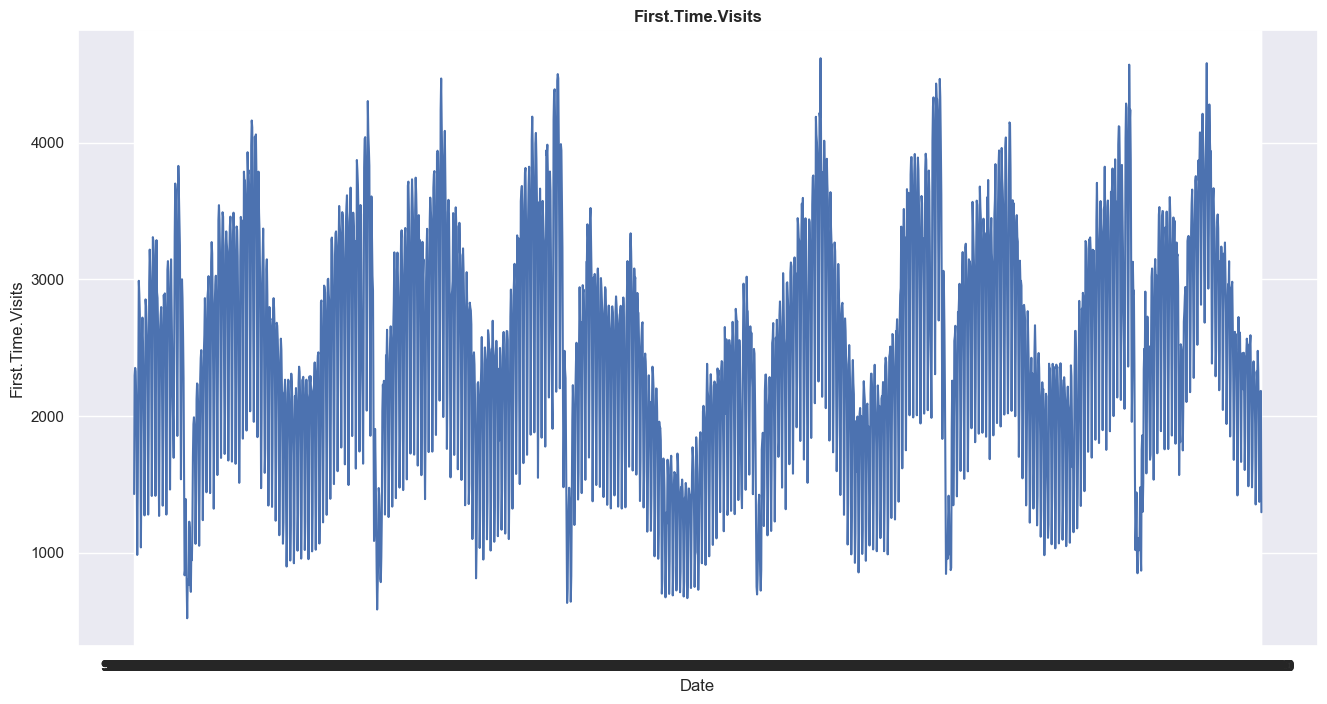

In [6]:
sns.lineplot(data=df,x='Date',y='First.Time.Visits')
plt.title('First.Time.Visits',fontsize=12,weight='bold')
plt.show()

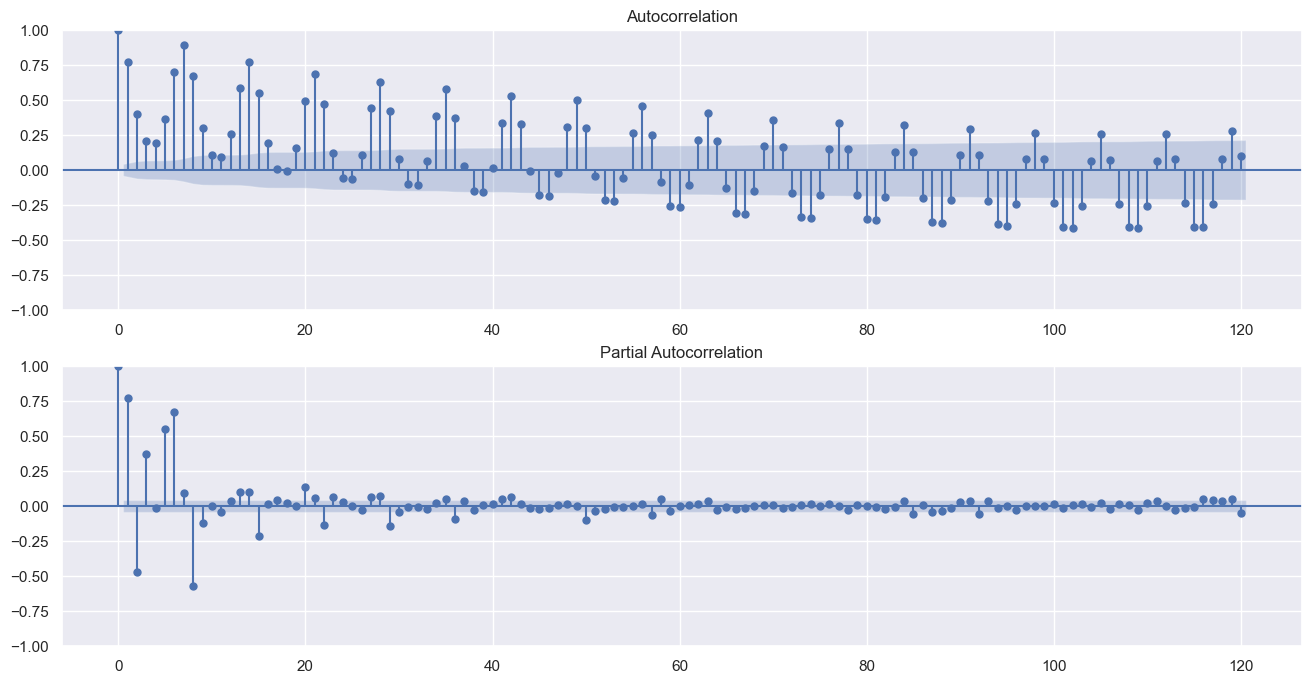

In [7]:
f=Forecaster(y=df['First.Time.Visits'],current_dates=df['Date'])
figs, axs = plt.subplots(2, 1)
f.plot_acf(ax=axs[0],lags=120)
f.plot_pacf(ax=axs[1],lags=120)
plt.show()

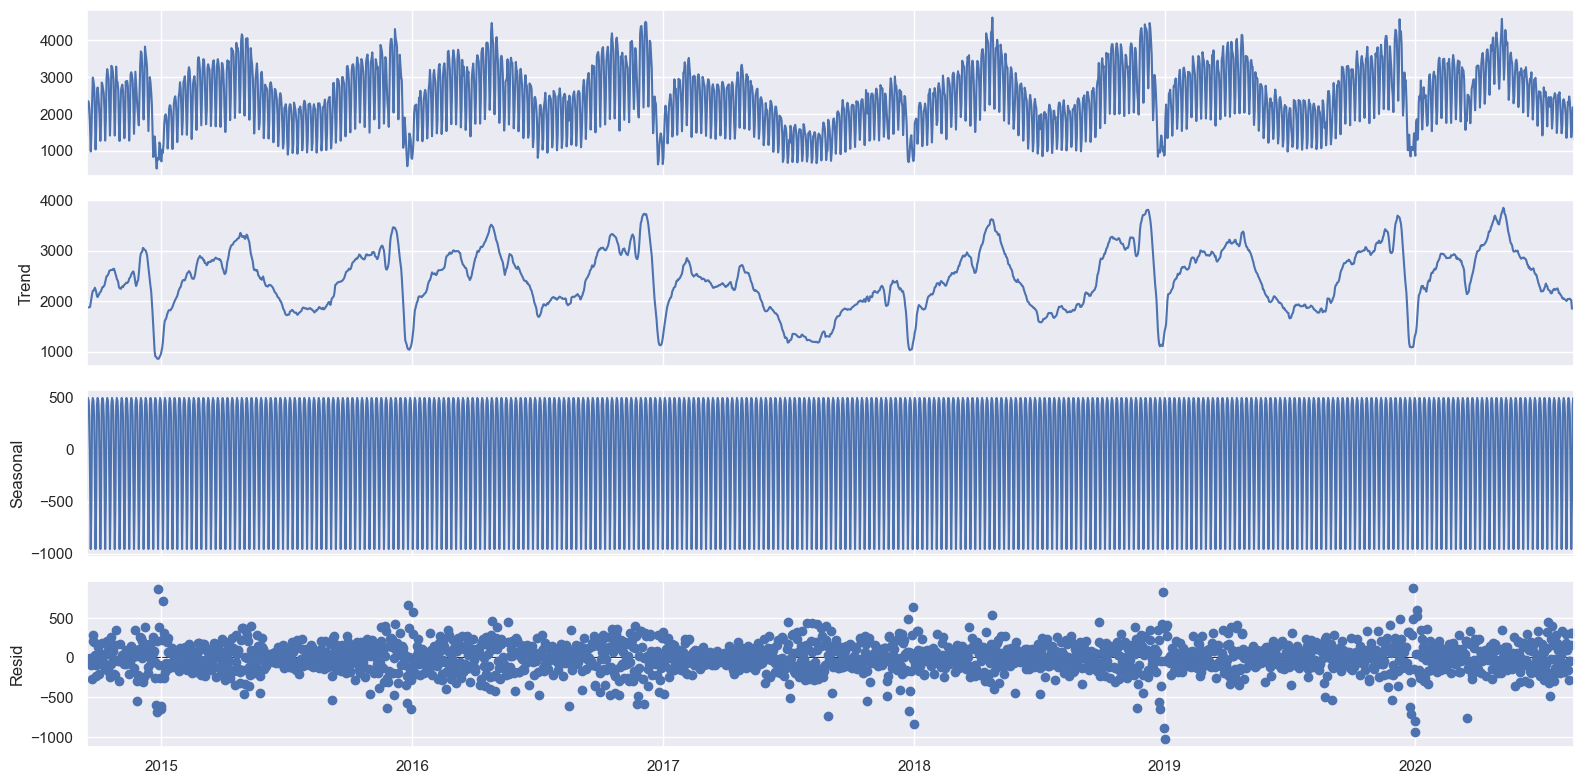

In [8]:
f.seasonal_decompose().plot()
plt.show()

In [9]:
critical_pval = 0.05
print('-'*100)
print('Augmented Dickey-Fuller results:')
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print('the test-stat value is: {:.2f}'.format(stat))
print('the p-value is {:.4f}'.format(pval))
print('the series is {}'.format('stationary' if pval < critical_pval else 'not stationary'))
print('-'*100)

----------------------------------------------------------------------------------------------------
Augmented Dickey-Fuller results:
the test-stat value is: -4.48
the p-value is 0.0002
the series is stationary
----------------------------------------------------------------------------------------------------


## **Forecaster**

In [19]:
f.generate_future_dates(180)
f.set_test_length(.2)
f.set_estimator('prophet')
f

Forecaster(
    DateStartActuals=2014-09-14T00:00:00.000000000
    DateEndActuals=2020-08-19T00:00:00.000000000
    Freq=D
    N_actuals=2167
    ForecastLength=180
    Xvars=[]
    TestLength=433
    ValidationMetric=rmse
    ForecastsEvaluated=['prophet1']
    CILevel=None
    CurrentEstimator=prophet
    GridsFile=Grids
)

21:19:22 - cmdstanpy - INFO - Chain [1] start processing
21:19:23 - cmdstanpy - INFO - Chain [1] done processing
21:19:23 - cmdstanpy - INFO - Chain [1] start processing
21:19:24 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\scalecast\_utils.py:60: Warning: Confidence intervals not found for prophet1. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


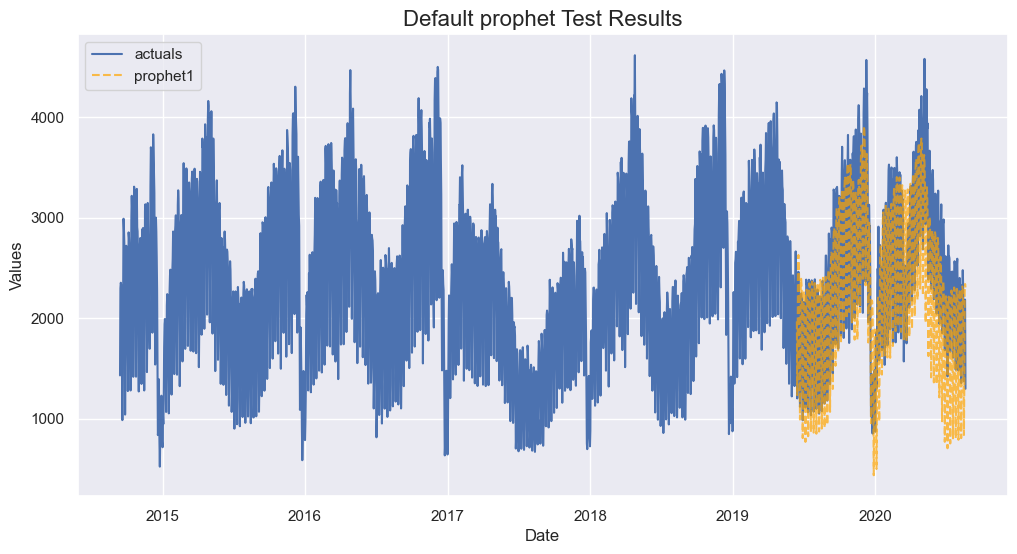

In [20]:
f.manual_forecast(call_me='prophet1')
f.plot_test_set(ci=True,models='prophet1')
plt.title('Default prophet Test Results',size=16)
plt.show()

   TestSetRMSE  InSampleRMSE  TestSetMAPE  InSampleMAPE
0   408.414608    283.198435     0.138082       0.10425


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\scalecast\_utils.py:60: Warning: Confidence intervals not found for prophet1. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


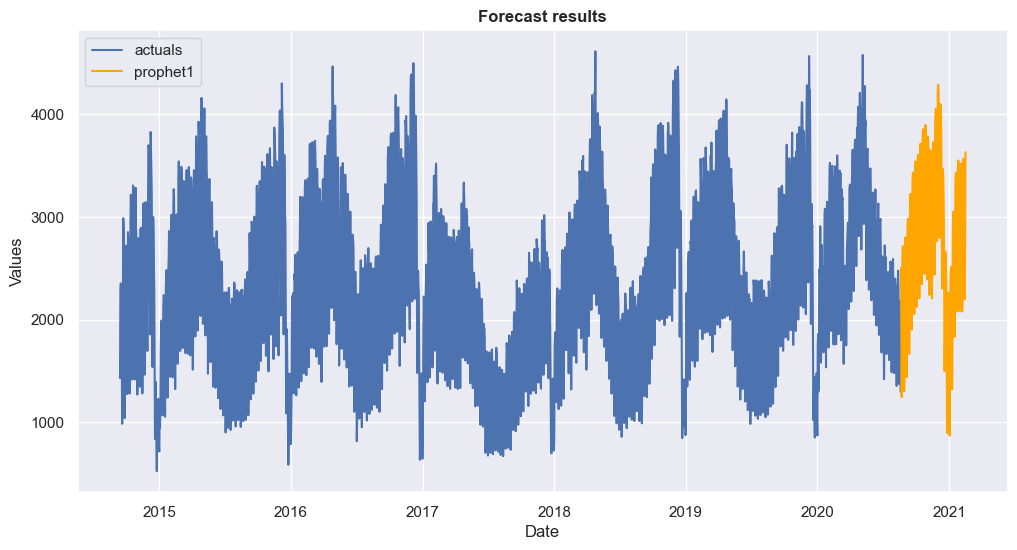

In [21]:
results = f.export('model_summaries')
print(results[['TestSetRMSE','InSampleRMSE','TestSetMAPE','InSampleMAPE']])
f.plot(ci=True,models='prophet1')
plt.title('Forecast results',size=16,fontsize=12,weight='bold')
plt.show()